In [25]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import nltk 


In [69]:
df = pd.read_csv('twitter_data_utf8.csv')

### Data Exploration

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [71]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [72]:
#changing column names since they are lenghty 
df.columns = ["tweet", "products", "emotion"]
df.head()

,tweet,products,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [73]:
df['products'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: products, dtype: int64

In [74]:
#check for missing values in tweet column
df[pd.isna(df["tweet"])]

,tweet,products,emotion
6,NaN,NaN,No emotion toward brand or product


In [75]:
#drop this row
df.dropna(subset=["tweet"], inplace=True)

In [76]:
#check for missing value in row
df[pd.isna(df['products'])]

,tweet,products,emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
34,Anyone at #SXSW who bought the new iPad want ...,NaN,No emotion toward brand or product
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [77]:
#It seems like quite a lot of rows are NaN, here I am checking the percentage of NaN in the product column

missing_products_percentage = (df['products'].isna().sum() / len(df)) * 100
print(round(missing_products_percentage, 2))

63.8


In [78]:
# Replacing the NaNs with "Unknown"
df["products"].fillna("Unknown", inplace=True)

In [79]:
# Verifying that the missing values have been dealt with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     9092 non-null   object
 1   products  9092 non-null   object
 2   emotion   9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


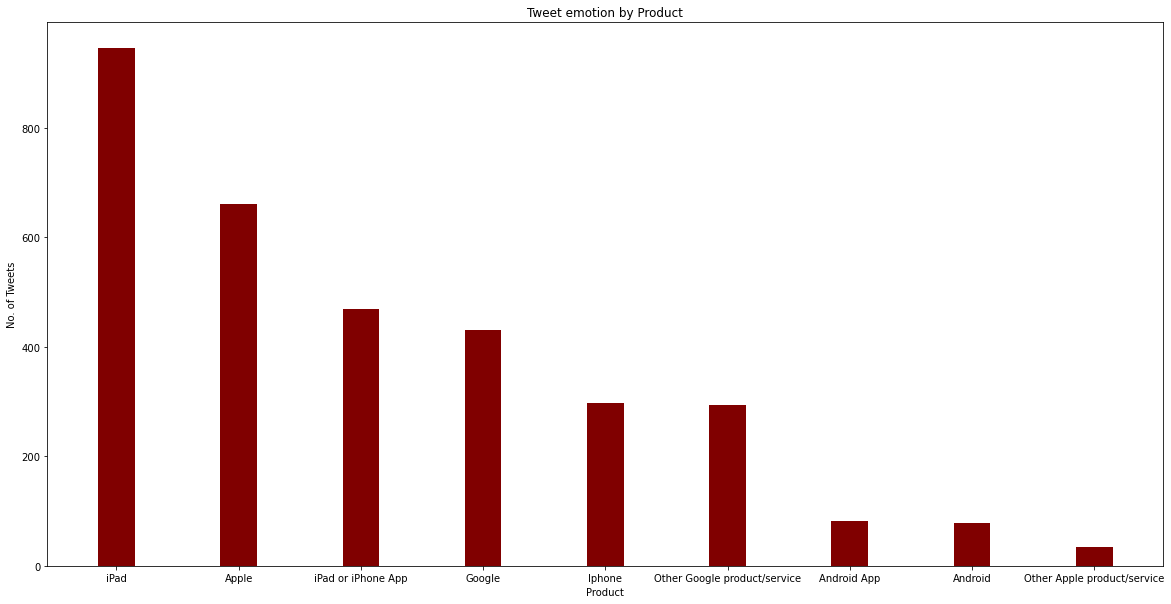

In [80]:

data = {'iPad':946, 'Apple':661, 'iPad or iPhone App':470, 'Google':430, 'Iphone':297,
        'Other Google product/service':293, 'Android App':81, 'Android':78, 
        'Other Apple product/service':35}
courses = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (20, 10))

plt.bar(courses, values, color ='maroon', 
        width = 0.3)

plt.xlabel("Product")
plt.ylabel("No. of Tweets")
plt.title("Tweet emotion by Product")
plt.show()

In [48]:
df['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

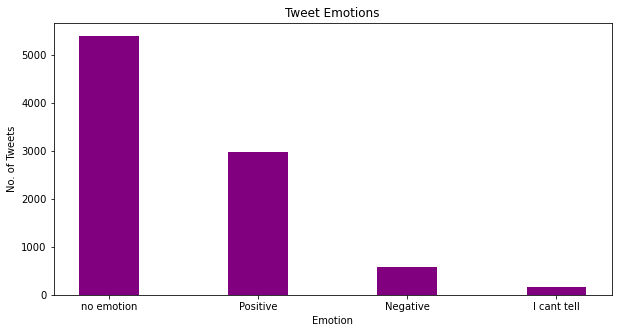

In [49]:

data = { 'no emotion':5389, 'Positive':2978, 'Negative':570, 'I cant tell':156}
courses = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='purple', 
        width = 0.4)

plt.xlabel("Emotion")
plt.ylabel("No. of Tweets")
plt.title("Tweet Emotions")
plt.show()